In [55]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [56]:
FinalMerge = pd.read_excel('../2progs/FinalMerge.xlsx',sheet_name='Sheet1',index_col = 0)

In [57]:
FinalMerge

,hhid,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,...,share_toilet_Yes,share_toilet_nan,childunder5_death5yrs_No,childunder5_death5yrs_Yes,childunder5_death5yrs_nan,EducationTotalSpend,FoodTotalSpend,NonFoodTotalSpend,EnergyTotalSpend,Total_Spend
0,10,5,1,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,...,1,0,1,0,0,19100.000060,7642,1031.994440,1000,28773.994501
1,11,6,1,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,...,1,0,1,0,0,220.000000,2120,94.158150,550,2984.158150
2,12,6,1,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,...,0,1,1,0,0,400.000000,900,282.654090,200,1782.654090
3,14,14,1,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,...,0,1,1,0,0,250.000000,1910,159.810690,240,2559.810690
4,15,2,0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,...,1,0,1,0,0,9500.000000,2210,596.885089,600,12906.885089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,5977,15,1,0.133333,0.000000,0.133333,0.333333,0.400000,0.066667,0.066667,...,1,0,1,0,0,600.000008,1420,210.000000,650,2880.000008
1086,5986,2,0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,...,1,0,1,0,0,0.000000,820,618.490350,850,2288.490350
1087,5992,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1,0,1,0,0,500.000000,5700,0.000000,50,6250.000000
1088,6002,4,1,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,...,0,1,1,0,0,50.000000,2280,517.662840,0,2847.662840


In [58]:
FinalMerge['Total_Spend'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1085    False
1086    False
1087    False
1088    False
1089    False
Name: Total_Spend, Length: 1090, dtype: bool

In [59]:
FinalMerge['hh_purchasedfood7d_Yes']

0       1
1       1
2       1
3       1
4       1
       ..
1085    1
1086    1
1087    1
1088    1
1089    1
Name: hh_purchasedfood7d_Yes, Length: 1090, dtype: int64

In [60]:
#converting to floats
FinalMerge['number_dwellings'] = FinalMerge['number_dwellings'].astype(float)
FinalMerge['number_habitablerooms'] = FinalMerge['number_habitablerooms'].astype(float)
FinalMerge['share_toilet_Yes'] = FinalMerge['share_toilet_Yes'].astype(float)
FinalMerge['own_radio_Yes'] = FinalMerge['own_radio_Yes'].astype(float)
FinalMerge['own_television_Yes'] = FinalMerge['own_television_Yes'].astype(float)
FinalMerge['own_satelitedish_Yes'] = FinalMerge['own_satelitedish_Yes'].astype(float)
FinalMerge['own_smartphone_Yes'] = FinalMerge['own_smartphone_Yes'].astype(float)
FinalMerge['own_refrigerator_Yes'] = FinalMerge['own_refrigerator_Yes'].astype(float)
FinalMerge['own_table_Yes'] = FinalMerge['own_table_Yes'].astype(float)
FinalMerge['own_bed_Yes'] = FinalMerge['own_bed_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_mosquitonet_Yes'] = FinalMerge['own_mosquitonet_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_fan_Yes'] = FinalMerge['own_fan_Yes'].astype(float)
FinalMerge['own_bicycle_Yes'] = FinalMerge['own_bicycle_Yes'].astype(float)
FinalMerge['own_motorcycle_Yes'] = FinalMerge['own_motorcycle_Yes'].astype(float)
FinalMerge['own_generator_Yes'] = FinalMerge['own_generator_Yes'].astype(float)
FinalMerge['own_solarpanels_Yes'] = FinalMerge['own_solarpanels_Yes'].astype(float)
FinalMerge['own_kerosenestove_Yes'] = FinalMerge['own_kerosenestove_Yes'].astype(float)
FinalMerge['own_charcoaljiko_Yes'] = FinalMerge['own_charcoaljiko_Yes'].astype(float)
FinalMerge['own_wheelbarrow_Yes'] = FinalMerge['own_wheelbarrow_Yes'].astype(float)
FinalMerge['own_ironfencing_Yes'] = FinalMerge['own_ironfencing_Yes'].astype(float)
FinalMerge['own_farmanimals_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['hh_purchasedfood7d_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['foodwasfree_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)

#for own_car variable, all of them were a no, so they were dropped

#Rest of float variables for the unrestricted dataset 
FinalMerge['headFemale'] = FinalMerge['headFemale'].astype(float)
FinalMerge['size'] = FinalMerge['size'].astype(float)
FinalMerge['shareWithEarlyChildhood'] = FinalMerge['shareWithEarlyChildhood'].astype(float)
FinalMerge['issue'] = FinalMerge['issue'].astype(float)
FinalMerge['foodspent_localcurrecny'] = FinalMerge['foodspent_localcurrecny'].astype(float)
FinalMerge['familysize1'] = FinalMerge['familysize1'].astype(float)
FinalMerge['familysize2'] = FinalMerge['familysize2'].astype(float)
FinalMerge['familysize3'] = FinalMerge['familysize3'].astype(float)
FinalMerge['familysize4'] = FinalMerge['familysize4'].astype(float)
FinalMerge['familysize5'] = FinalMerge['familysize5'].astype(float)
FinalMerge['floor_material'] = FinalMerge['floor_material'].astype(float)
FinalMerge['roof_material'] = FinalMerge['roof_material'].astype(float)
FinalMerge['toilet_type'] = FinalMerge['toilet_type'].astype(float)
FinalMerge['lighting_source'] = FinalMerge['lighting_source'].astype(float)
FinalMerge['rentpaid_shillings'] = FinalMerge['rentpaid_shillings'].astype(float)
FinalMerge['relatives_abroad_Yes'] = FinalMerge['relatives_abroad_Yes'].astype(float)
FinalMerge['borrowedfrom_sources12mo_Yes'] = FinalMerge['borrowedfrom_sources12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_bank12mo_Yes'] = FinalMerge['borrowedfrom_bank12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_community_Yes'] = FinalMerge['borrowedfrom_community_Yes'].astype(float)
FinalMerge['borrowedfrom_familyorfriends12mo_Yes'] = FinalMerge['borrowedfrom_familyorfriends12mo_Yes'].astype(float)
FinalMerge['remittances_abroad_Yes'] = FinalMerge['remittances_abroad_Yes'].astype(float)
FinalMerge['purchased_insurance_Yes'] = FinalMerge['purchased_insurance_Yes'].astype(float)
FinalMerge['sellhhgoods_lackfood_Yes'] = FinalMerge['sellhhgoods_lackfood_Yes'].astype(float)
FinalMerge['withdrawchildrenschool_lackfood_Yes'] = FinalMerge['withdrawchildrenschool_lackfood_Yes'].astype(float)
FinalMerge['sellanimals:lackfood_Yes'] = FinalMerge['sellanimals:lackfood_Yes'].astype(float)
FinalMerge['beg_lackfood_Yes'] = FinalMerge['beg_lackfood_Yes'].astype(float)
FinalMerge['drikingwater_source'] = FinalMerge['drikingwater_source'].astype(float)
FinalMerge['crowdindex_room'] = FinalMerge['crowdindex_room'].astype(float)
FinalMerge['LCS_index'] = FinalMerge['LCS_index'].astype(float)
FinalMerge['poorIPL'] = FinalMerge['poorIPL'].astype(float)
FinalMerge['childunder5_death5yrs_Yes'] = FinalMerge['childunder5_death5yrs_Yes'].astype(float)
FinalMerge['sellfemaleanimal_last_Yes'] = FinalMerge['sellfemaleanimal_last_Yes'].astype(float)
FinalMerge['wall_material'] = FinalMerge['wall_material'].astype(float)
FinalMerge['relatives_outsidekenya_Yes'] = FinalMerge['relatives_outsidekenya_Yes'].astype(float)
FinalMerge['own_bankaccount_Yes'] = FinalMerge['own_bankaccount_Yes'].astype(float)
FinalMerge['healthandeduc_reduction_Yes'] = FinalMerge['healthandeduc_reduction_Yes'].astype(float)
FinalMerge['own_bankaccount_Yes'] = FinalMerge['own_bankaccount_Yes'].astype(float)
FinalMerge['sellassets_lackfood_Yes'] = FinalMerge['sellassets_lackfood_Yes'].astype(float)
FinalMerge['borrowmoneyfood_lackfood_Yes'] = FinalMerge['borrowmoneyfood_lackfood_Yes'].astype(float)
FinalMerge['sellhouseland_lackfood_Yes'] = FinalMerge['sellhouseland_lackfood_Yes'].astype(float)
FinalMerge['spendsavings:lackfood_Yes'] = FinalMerge['spendsavings:lackfood_Yes'].astype(float)
FinalMerge['drinkingwater_insufficientquanities_Yes'] = FinalMerge['drinkingwater_insufficientquanities_Yes'].astype(float)
FinalMerge['childunder5_death5yrs'] = FinalMerge['childunder5_death5yrs_Yes'].astype(float)

In [61]:
restricted_set = FinalMerge[['number_dwellings', 'number_habitablerooms', 'own_radio_Yes', 
                                       'own_television_Yes', 'own_satelitedish_Yes', 'own_smartphone_Yes', 'own_refrigerator_Yes',
                                      'own_table_Yes', 'own_bed_Yes', 'own_mattress_Yes', 'own_mosquitonet_Yes', 'own_fan_Yes', 'own_bicycle_Yes',
                                      'own_motorcycle_Yes', 'own_generator_Yes', 'own_solarpanels_Yes', 'own_kerosenestove_Yes',
                                      'own_charcoaljiko_Yes', 'own_wheelbarrow_Yes', 'own_ironfencing_Yes', 'own_farmanimals_Yes', 
                            'headFemale', 'shareFemale','shareAgeZeroToFour','shareAgeFiveToNine', 'shareAgeTenToFourteen', 
    'shareAgeFifteenToTwentyfour', 'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus','shareMaleAgeTenToNineteen',
    'shareFemaleAgeTenToNineteen', 'shareMaleAgeTwentytoFourtynine', 'shareFemaleAgeTwentytoFourtynine',
    'shareWithNoEducation', 'shareWithEarlyChildhood', 'shareWithPrimary', 'shareWithSecondary', 'shareWithVocational',
    'shareWithUniversity', 'shareWithOther',  'lighting_source', 
                            'floor_material', 'roof_material', 'wall_material', 'toilet_type', 'share_toilet_Yes', 
                             'foodwasfree_Yes','hh_purchasedfood7d_Yes']].fillna(0)


#Error rates: 
#use model coefficients to predict log expenditure in dataset----will have actual and predicted expenditure
#get metric: of the lowest 25% in terms of actual expenditure (1100/4), 
#how many of those are correctly predicted to be in the lowest 25% in predicted column
#2/3 if 2 out 3 people write, 1/3 would be exclusion error (inverse is exclusion error)
#want 25% to be flexible, adjust to 10%, 40% etc. 
#do test train split at 75% train, 25% test


In [62]:
ln_expenditure_per_capita = np.log(FinalMerge['Total_Spend']/FinalMerge['size'])


In [63]:
y = ln_expenditure_per_capita

X = restricted_set



In [64]:
#Ridge Model - restricted set
alphas = 10**np.linspace(10,-2,100)*0.5
#generate an array of alpha values ranging from very big to very small, essentially covering the 
#full range of scenarios from the null model containing only the intercept, to the least squares fit
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [65]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 48)

In [66]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [67]:
#cross validation to choose optimal alpha

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.4348745013088917

In [68]:
#Test MSE w/ optimal alpha

ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.6472934740289988

In [69]:
#Fit ridge model w/ optimal alpha 
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

#generator---negative, double check definition, look at reads/speaks/writes variables---speaks shouldn't be negative
#are there a lot of missing values? 
#remove speaks, reads, writes from restricted set

number_dwellings                   -0.078370
number_habitablerooms              -0.052824
own_radio_Yes                       0.172953
own_television_Yes                  0.041606
own_satelitedish_Yes                0.267731
own_smartphone_Yes                  0.071721
own_refrigerator_Yes                0.493806
own_table_Yes                       0.075351
own_bed_Yes                         0.164916
own_mattress_Yes                    0.058795
own_mosquitonet_Yes                 0.020464
own_fan_Yes                         0.093413
own_bicycle_Yes                     0.153187
own_motorcycle_Yes                  0.003724
own_generator_Yes                  -0.263865
own_solarpanels_Yes                -0.007237
own_kerosenestove_Yes               0.210247
own_charcoaljiko_Yes                0.135301
own_wheelbarrow_Yes                 0.182705
own_ironfencing_Yes                 0.100835
own_farmanimals_Yes                -0.032093
headFemale                         -0.040823
shareFemal

In [70]:
Y_test_ridge = ridge4.predict(X_test)
Y_test_ridge = pd.Series(Y_test_ridge)
Predicted_vs_Actual = pd.DataFrame(Y_test_ridge, columns=['Y Test'])
Predicted_vs_Actual['log(Total Spend/capita)'] = y
Predicted_vs_Actual

,Y Test,log(Total Spend/capita)
0,7.781815,8.657789
1,6.676995,6.209313
2,6.687317,5.694099
3,7.064000,5.208631
4,6.864032,8.772369
...,...,...
268,6.957502,5.855788
269,7.028131,7.138037
270,6.920736,6.628041
271,6.882372,8.092154


In [71]:
#For bottom 25% 
Predicted_vs_Actual = Predicted_vs_Actual.sort_values(by=['log(Total Spend/capita)'])
Predicted_vs_Actual.iloc[68]
Predicted_vs_Actual['included bottom percentage actual spend'] = np.where(Predicted_vs_Actual['log(Total Spend/capita)'] < 6.647755, 1, 0)

In [72]:
Predicted_vs_Actual = Predicted_vs_Actual.sort_values(by=['Y Test'])
Predicted_vs_Actual.iloc[68]
Predicted_vs_Actual['included bottom percentage test spend'] = np.where(Predicted_vs_Actual['Y Test'] < 6.818278, 1, 0)

Predicted_vs_Actual

,Y Test,log(Total Spend/capita),included bottom percentage actual spend,included bottom percentage test spend
39,6.509402,7.333039,0,1
232,6.513561,6.872454,0,1
219,6.519825,6.228470,1,1
152,6.530355,7.277907,0,1
211,6.543938,8.427600,0,1
...,...,...,...,...
221,7.957303,6.976913,0,0
206,7.960246,7.613627,0,0
240,8.010141,7.370164,0,0
88,8.129357,7.143841,0,0


In [73]:
Predicted_vs_Actual['correctly predicted'] = np.where(Predicted_vs_Actual['included bottom percentage actual spend'] == Predicted_vs_Actual['included bottom percentage test spend'], True, False)
Predicted_vs_Actual['correctly predicted'].value_counts()

#38% exclusion error for lowest 25% of actual expenditure - ridge model

True     171
False    102
Name: correctly predicted, dtype: int64

In [74]:
#would be for unrestricted set
unwanted = FinalMerge.columns[FinalMerge.columns.str.startswith('spend_')]
FinalMerge.drop(unwanted, axis=1, inplace=True)

unwanted2 = FinalMerge.columns[FinalMerge.columns.str.endswith('TotalSpend')]
FinalMerge.drop(unwanted2, axis=1, inplace=True)

unwanted3 = FinalMerge.columns[FinalMerge.columns.str.startswith('q_')]
FinalMerge.drop(unwanted3, axis=1, inplace=True)

unwanted4 = FinalMerge.columns[FinalMerge.columns.str.startswith('totalcost')]
FinalMerge.drop(unwanted4, axis=1, inplace=True)

unwanted5 = FinalMerge.columns[FinalMerge.columns.str.startswith('Dataset')]
FinalMerge.drop(unwanted5, axis=1, inplace=True)

unwanted6 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhsize')]
FinalMerge.drop(unwanted6, axis=1, inplace=True)

unwanted7 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q2')]
FinalMerge.drop(unwanted7, axis=1, inplace=True)

unwanted8 = FinalMerge.columns[FinalMerge.columns.str.startswith('weight')]
FinalMerge.drop(unwanted8, axis=1, inplace=True)

unwanted9 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhid')]
FinalMerge.drop(unwanted9, axis=1, inplace=True)

unwanted10 = FinalMerge.columns[FinalMerge.columns.str.startswith('popweight')]
FinalMerge.drop(unwanted10, axis=1, inplace=True)

unwanted11 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhlocation')]
FinalMerge.drop(unwanted11, axis=1, inplace=True)

unwanted12 = FinalMerge.columns[FinalMerge.columns.str.startswith('improved_sanitation')]
FinalMerge.drop(unwanted12, axis=1, inplace=True)

unwanted13 = FinalMerge.columns[FinalMerge.columns.str.startswith('improved_water')]
FinalMerge.drop(unwanted13, axis=1, inplace=True)

unwanted14 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q5')]
FinalMerge.drop(unwanted14, axis=1, inplace=True)

unwanted15 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q19')]
FinalMerge.drop(unwanted15, axis=1, inplace=True)

unwanted16 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q20')]
FinalMerge.drop(unwanted16, axis=1, inplace=True)

unwanted17 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q21')]
FinalMerge.drop(unwanted17, axis=1, inplace=True)

#why are there variables that aren't named?
Remove_extra_vars = FinalMerge.columns[FinalMerge.columns.str.endswith('_No')]
FinalMerge.drop(Remove_extra_vars, axis=1, inplace=True)

Remove_extra_vars2 = FinalMerge.columns[FinalMerge.columns.str.endswith('_nan')]
FinalMerge.drop(Remove_extra_vars2, axis=1, inplace=True)

In [75]:
#Creating Unrestricted Dataset 

In [76]:
Unrestricted = pd.DataFrame(FinalMerge)
Unrestricted.head()

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,borrowmoneyfood_lackfood_Yes,sellhouseland_lackfood_Yes,withdrawchildrenschool_lackfood_Yes,sellanimals:lackfood_Yes,sellfemaleanimal_last_Yes,beg_lackfood_Yes,share_toilet_Yes,childunder5_death5yrs_Yes,Total_Spend,childunder5_death5yrs
0,5.0,1.0,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28773.994501,0.0
1,6.0,1.0,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.666667,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2984.158150,0.0
2,6.0,1.0,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1782.654090,0.0
3,14.0,1.0,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,0.071429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2559.810690,0.0
4,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12906.885089,0.0


In [77]:
FinalMerge.head()

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,borrowmoneyfood_lackfood_Yes,sellhouseland_lackfood_Yes,withdrawchildrenschool_lackfood_Yes,sellanimals:lackfood_Yes,sellfemaleanimal_last_Yes,beg_lackfood_Yes,share_toilet_Yes,childunder5_death5yrs_Yes,Total_Spend,childunder5_death5yrs
0,5.0,1.0,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28773.994501,0.0
1,6.0,1.0,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.666667,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2984.158150,0.0
2,6.0,1.0,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1782.654090,0.0
3,14.0,1.0,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,0.071429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2559.810690,0.0
4,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12906.885089,0.0


In [78]:
y = ln_expenditure_per_capita

X = restricted_set


In [79]:
#Lasso Model - restricted set
alphas = 10**np.linspace(10,-2,100)*0.5

In [80]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Text(0, 0.5, 'weights')

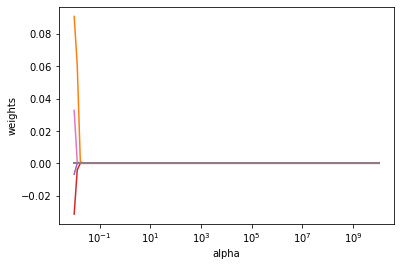

In [81]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [82]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.6640737074827431

In [83]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

#table for ridge coefficients conditional on alpha, same w/ lasso, have error metrics for lasso and ridge

number_dwellings                   -0.016042
number_habitablerooms              -0.065128
own_radio_Yes                       0.179641
own_television_Yes                  0.000000
own_satelitedish_Yes                0.445568
own_smartphone_Yes                  0.000000
own_refrigerator_Yes                0.000000
own_table_Yes                       0.071729
own_bed_Yes                         0.102782
own_mattress_Yes                    0.020767
own_mosquitonet_Yes                 0.000000
own_fan_Yes                         0.000000
own_bicycle_Yes                     0.116363
own_motorcycle_Yes                  0.000000
own_generator_Yes                   0.000000
own_solarpanels_Yes                -0.000000
own_kerosenestove_Yes               0.140327
own_charcoaljiko_Yes                0.119118
own_wheelbarrow_Yes                 0.120342
own_ironfencing_Yes                -0.000000
own_farmanimals_Yes                -0.000000
headFemale                         -0.000000
shareFemal

In [84]:
Y_test_lasso = lasso.predict(X_test)
Y_test_lasso = pd.DataFrame(Y_test_lasso, columns=['Y Test'])

In [85]:
Predicted_vs_Actual_Lasso = pd.DataFrame(Y_test_lasso, columns=['Y Test'])
Predicted_vs_Actual_Lasso['log(Total Spend/capita)'] = y
Predicted_vs_Actual_Lasso


#why are there 545 rows?

,Y Test,log(Total Spend/capita)
0,7.633702,8.657789
1,6.673584,6.209313
2,6.710421,5.694099
3,6.928224,5.208631
4,6.744356,8.772369
...,...,...
268,6.911604,5.855788
269,6.942557,7.138037
270,6.963143,6.628041
271,6.968063,8.092154


In [86]:
Predicted_vs_Actual_Lasso = Predicted_vs_Actual_Lasso.sort_values(by=['log(Total Spend/capita)'])
Predicted_vs_Actual_Lasso.iloc[68]
Predicted_vs_Actual_Lasso['included bottom percentage actual spend'] = np.where(Predicted_vs_Actual_Lasso['log(Total Spend/capita)'] < 6.330674, 1, 0)



In [87]:
Predicted_vs_Actual_Lasso = Predicted_vs_Actual_Lasso.sort_values(by=['Y Test'])
Predicted_vs_Actual_Lasso.iloc[68]
Predicted_vs_Actual_Lasso['included bottom percentage test spend'] = np.where(Predicted_vs_Actual_Lasso['Y Test'] < 6.771060, 1, 0)

Predicted_vs_Actual_Lasso

,Y Test,log(Total Spend/capita),included bottom percentage actual spend,included bottom percentage test spend
260,6.490032,7.632272,0,1
38,6.497676,6.859839,0,1
39,6.530453,7.333039,0,1
211,6.565619,8.427600,0,1
152,6.577720,7.277907,0,1
...,...,...,...,...
221,7.970971,6.976913,0,0
40,7.983539,7.233430,0,0
88,8.036430,7.143841,0,0
240,8.066457,7.370164,0,0


In [88]:
Predicted_vs_Actual_Lasso['correctly predicted'] = np.where(Predicted_vs_Actual_Lasso['included bottom percentage actual spend'] == Predicted_vs_Actual_Lasso['included bottom percentage test spend'], True, False)
Predicted_vs_Actual_Lasso['correctly predicted'].value_counts()

#30% exclusion error w/ lasso model for lowest 25% of expenditure

True     203
False     70
Name: correctly predicted, dtype: int64

In [89]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [90]:
#Testing Alphas for Net Elastic Model"
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha= a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.25, MSE:0.57, RMSE:0.75
Alpha:0.0010, R2:0.25, MSE:0.57, RMSE:0.75
Alpha:0.0100, R2:0.22, MSE:0.59, RMSE:0.77
Alpha:0.1000, R2:0.06, MSE:0.71, RMSE:0.84
Alpha:0.3000, R2:0.00, MSE:0.76, RMSE:0.87
Alpha:0.5000, R2:0.00, MSE:0.76, RMSE:0.87
Alpha:0.7000, R2:0.00, MSE:0.76, RMSE:0.87
Alpha:1.0000, R2:0.00, MSE:0.76, RMSE:0.87


/Users/fernandoguzman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11941743860597853, tolerance: 0.08230128528512223
  model = cd_fast.enet_coordinate_descent(


In [91]:
#Testing Best Alpha 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
        'l1_ratio':[.1,.2,.25,.4,.5,.6,.75,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X,y)
search.best_params_ 

{'alpha': 0.0001, 'l1_ratio': 0.8}

In [92]:
abs(search.best_score_)

0.6176963782400086

In [93]:
# Train the model 
e_net= ElasticNet(alpha = 0.01) 
e_net.fit(X_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.6572126866144417


,Columns,Coefficient Estimate
0,number_dwellings,-0.030114
1,number_habitablerooms,-0.081377
2,own_radio_Yes,0.169700
3,own_television_Yes,0.000000
4,own_satelitedish_Yes,0.000000
5,own_smartphone_Yes,0.030036
6,own_refrigerator_Yes,0.000000
7,own_table_Yes,0.084220
8,own_bed_Yes,0.071951
9,own_mattress_Yes,0.054430


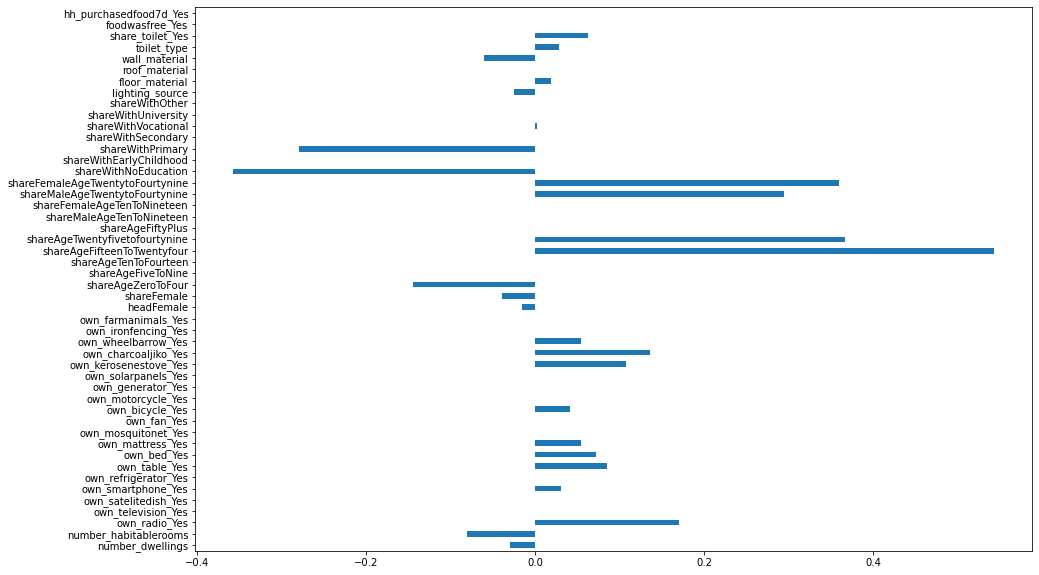

In [94]:
plt.figure(figsize= (15,10))
plt_figure= pd.Series(e_net.coef_, index= X.columns)
plt_figure.plot(kind='barh')
plt.show()

In [95]:
y_test_elastic = pd.DataFrame(y_pred_elastic, columns=['Y Test'])

In [96]:
Predicted_vs_Actual_Elastic = pd.DataFrame(y_test_elastic, columns=['Y Test'])
Predicted_vs_Actual_Elastic['log(Total Spend/capita)'] = y
Predicted_vs_Actual_Elastic

,Y Test,log(Total Spend/capita)
0,7.752900,8.657789
1,6.695343,6.209313
2,6.678052,5.694099
3,6.860142,5.208631
4,6.697718,8.772369
...,...,...
268,6.821808,5.855788
269,6.892643,7.138037
270,7.000060,6.628041
271,6.952913,8.092154


In [97]:
Predicted_vs_Actual_Elastic = Predicted_vs_Actual_Elastic.sort_values(by=['log(Total Spend/capita)'])
Predicted_vs_Actual_Elastic.iloc[68]
Predicted_vs_Actual_Elastic['included bottom percentage actual spend'] = np.where(Predicted_vs_Actual_Elastic['log(Total Spend/capita)'] < 6.647755, 1, 0)


In [98]:
Predicted_vs_Actual_Elastic = Predicted_vs_Actual_Elastic.sort_values(by=['Y Test'])
Predicted_vs_Actual_Elastic.iloc[68]
Predicted_vs_Actual_Elastic['included bottom percentage test spend'] = np.where(Predicted_vs_Actual_Elastic['Y Test'] < 6.774395, 1, 0)

Predicted_vs_Actual_Elastic


,Y Test,log(Total Spend/capita),included bottom percentage actual spend,included bottom percentage test spend
152,6.408537,7.277907,0,1
39,6.511782,7.333039,0,1
230,6.518415,6.971911,0,1
38,6.549551,6.859839,0,1
62,6.552983,4.802885,1,1
...,...,...,...,...
221,7.865772,6.976913,0,0
145,7.973544,7.169651,0,0
88,8.032854,7.143841,0,0
40,8.043418,7.233430,0,0


In [99]:
Predicted_vs_Actual_Elastic['correctly predicted'] = np.where(Predicted_vs_Actual_Elastic['included bottom percentage actual spend'] == Predicted_vs_Actual_Elastic['included bottom percentage test spend'], True, False)
Predicted_vs_Actual_Elastic['correctly predicted'].value_counts()

#36% exclusion error, elastic net model for lowest 25% of expenditure


True     179
False     94
Name: correctly predicted, dtype: int64

In [110]:
ln_expenditure_per_capita = np.log(FinalMerge['Total_Spend']/FinalMerge['size'])

In [111]:
Y = ln_expenditure_per_capita

x = Unrestricted
x

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,borrowmoneyfood_lackfood_Yes,sellhouseland_lackfood_Yes,withdrawchildrenschool_lackfood_Yes,sellanimals:lackfood_Yes,sellfemaleanimal_last_Yes,beg_lackfood_Yes,share_toilet_Yes,childunder5_death5yrs_Yes,Total_Spend,childunder5_death5yrs
0,5.0,1.0,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28773.994501,0.0
1,6.0,1.0,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.666667,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2984.158150,0.0
2,6.0,1.0,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1782.654090,0.0
3,14.0,1.0,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,0.071429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2559.810690,0.0
4,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12906.885089,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,15.0,1.0,0.133333,0.000000,0.133333,0.333333,0.400000,0.066667,0.066667,0.733333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2880.000008,0.0
1086,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2288.490350,0.0
1087,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6250.000000,0.0
1088,4.0,1.0,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2847.662840,0.0


In [112]:
#Perform all three tests with unrestricted set... changed the X -->x, and y__>Y
x_train, x_test , Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=1)

In [113]:
print(Unrestricted.dtypes)

size                         float64
headFemale                   float64
shareFemale                  float64
shareAgeZeroToFour           float64
shareAgeFiveToNine           float64
                              ...   
beg_lackfood_Yes             float64
share_toilet_Yes             float64
childunder5_death5yrs_Yes    float64
Total_Spend                  float64
childunder5_death5yrs        float64
Length: 97, dtype: object


In [117]:
# Train the model 
e_net= ElasticNet(alpha = 0.01) 
e_net.fit(x_train, Y_train) 
  
# calculate the prediction and mean square error 
Y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((Y_pred_elastic - Y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.2157825799495328


/Users/fernandoguzman/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5060070048713925, tolerance: 0.06044570274257359
  model = cd_fast.enet_coordinate_descent(


,Columns,Coefficient Estimate
0,number_dwellings,-0.132831
1,number_habitablerooms,-0.023451
2,own_radio_Yes,-0.093649
3,own_television_Yes,-0.101448
4,own_satelitedish_Yes,-0.000000
5,own_smartphone_Yes,-0.000000
6,own_refrigerator_Yes,0.175113
7,own_table_Yes,0.000000
8,own_bed_Yes,-0.000000
9,own_mattress_Yes,0.000000


In [46]:
out=[]
for j in range(0,1090):

    hhX=X.iloc[j].to_numpy()
    sum=0

    for i in range(0,49):

        sum=sum+lasso.coef_[i]*hhX[i]


    out.append(sum)
    
out

[-0.38319053315219065,
 0.38231786454451605,
 -0.4312209950172065,
 -0.3154885845586138,
 0.9494989924098814,
 0.05764640085530812,
 0.6459099900262214,
 0.16394719563677268,
 0.7551483401775202,
 0.6452213181519073,
 -0.1982986479544589,
 -0.0991807059499724,
 0.07587448575646452,
 0.03959438079026589,
 -0.09376259996135392,
 0.7111337428082951,
 -0.144291187502883,
 -0.32059678826087906,
 -0.1634731735004043,
 -0.022787236630353022,
 -0.4592482081426416,
 -0.23986479841636976,
 -0.3257890151568799,
 -0.13980403609608333,
 -0.21105692692836514,
 0.6587470773059647,
 0.0001437023915725963,
 -0.4497105060956413,
 -0.19613959193651792,
 0.04776612066686033,
 0.7488229767853218,
 0.010757892820803472,
 -0.003659717664002471,
 0.5524476389207984,
 -0.3967852075644886,
 0.7649302379495048,
 -0.23141616844240226,
 0.10671360030995007,
 0.28478170318177104,
 -0.43441252188170426,
 -0.3665232596118558,
 0.42202537501730025,
 -0.013987544331538138,
 -0.38298839391527545,
 -0.42294315854104403,


,number_dwellings,number_habitablerooms,own_radio_Yes,own_television_Yes,own_satelitedish_Yes,own_smartphone_Yes,own_refrigerator_Yes,own_table_Yes,own_bed_Yes,own_mattress_Yes,...,shareReads,shareWrites,lighting_source,floor_material,roof_material,wall_material,toilet_type,share_toilet_Yes,foodwasfree_Yes,hh_purchasedfood7d_Yes
0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1,1,1,1,1,1.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.500000,0.500000,1,2,1,1,2,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,2,1,1,1,3,0.0,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.333333,0.333333,3,1,1,2,3,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.000000,1.000000,1,3,1,2,2,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,4,1,1,1,2,1.0,0.0,0.0
1086,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.000000,1.000000,6,2,1,1,2,1.0,0.0,0.0
1087,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,2,1,1,1,2,1.0,0.0,0.0
1088,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3,1,1,1,3,0.0,0.0,0.0
